In [125]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Read data

In [126]:
df= pd.read_csv(r'C:\Users\Test\Downloads\archive\police.csv')
df

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


## Data exploration

In [127]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [128]:
df.shape

(91741, 15)

In [129]:
df.describe(include='O')

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_type,stop_outcome,is_arrested,stop_duration
count,91741,91741,86406,86408,86408,86408,3196,86408,86408,86408
unique,3768,1436,2,5,12,6,24,6,2,5
top,2012-01-11,11:00,M,White,Speeding,Speeding,Incident to Arrest,Citation,False,0-15 Min
freq,69,323,62895,62158,48463,48463,1219,77006,83479,69543


## Data cleaning process

### Drop unimportant columns 

In [130]:
df.drop(['county_name'],inplace=True,axis=1)
df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


### Check duplicates

In [131]:
df.drop_duplicates()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


### Handling nulls

In [132]:
df['search_type'].fillna('No search', inplace=True)
df['driver_age'].fillna(df['driver_age'].median(), inplace=True)
df['driver_age_raw'].fillna(df['driver_age_raw'].mode(), inplace=True)

In [133]:
df.driver_gender.isnull().sum()

5335

#### Most of these rows are empty, that is, it does not contain data

In [134]:
df.dropna(subset=['driver_gender'], inplace=True)

In [135]:
print(df.driver_gender.isnull().sum())

0


### Handling data types

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86406 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           86406 non-null  object 
 1   stop_time           86406 non-null  object 
 2   driver_gender       86406 non-null  object 
 3   driver_age_raw      86405 non-null  float64
 4   driver_age          86406 non-null  float64
 5   driver_race         86406 non-null  object 
 6   violation_raw       86406 non-null  object 
 7   violation           86406 non-null  object 
 8   search_conducted    86406 non-null  bool   
 9   search_type         86406 non-null  object 
 10  stop_outcome        86406 non-null  object 
 11  is_arrested         86406 non-null  object 
 12  stop_duration       86406 non-null  object 
 13  drugs_related_stop  86406 non-null  bool   
dtypes: bool(2), float64(2), object(10)
memory usage: 8.7+ MB


In [137]:
df['is_arrested'] = df['is_arrested'].astype(bool)
df['stop_date'] =pd.to_datetime(df['stop_date'])
df['stop_time'] = pd.to_datetime(df['stop_time'], format='%H:%M').dt.time

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86406 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           86406 non-null  datetime64[ns]
 1   stop_time           86406 non-null  object        
 2   driver_gender       86406 non-null  object        
 3   driver_age_raw      86405 non-null  float64       
 4   driver_age          86406 non-null  float64       
 5   driver_race         86406 non-null  object        
 6   violation_raw       86406 non-null  object        
 7   violation           86406 non-null  object        
 8   search_conducted    86406 non-null  bool          
 9   search_type         86406 non-null  object        
 10  stop_outcome        86406 non-null  object        
 11  is_arrested         86406 non-null  bool          
 12  stop_duration       86406 non-null  object        
 13  drugs_related_stop  86406 non-null  bool          


## EDA process

C:\Users\Test\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Test\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Test\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Test\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

C:\Users\Test\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

C:\Users\Test\anaconda3\Lib\site-pa

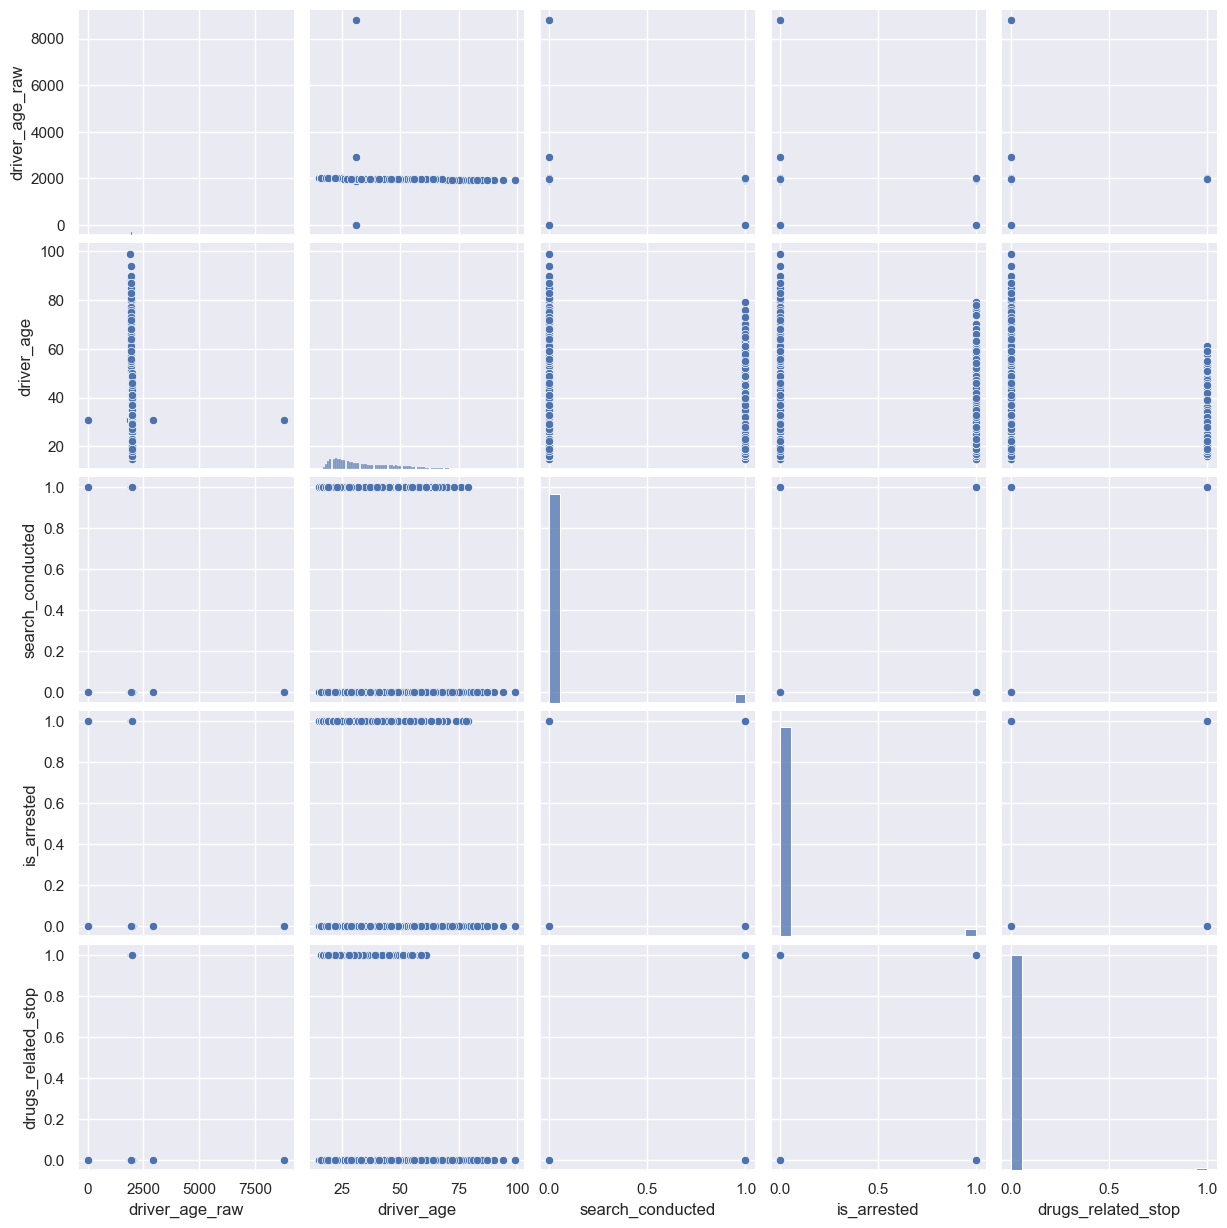

In [139]:
sns.pairplot(df)
plt.show()

## Analysis process

In [140]:
corr=df.corr(numeric_only=True)
corr

,driver_age_raw,driver_age,search_conducted,is_arrested,drugs_related_stop
driver_age_raw,1.000000,-0.102501,0.014265,0.010317,0.010809
driver_age,-0.102501,1.000000,-0.051485,-0.032216,-0.044843
search_conducted,0.014265,-0.051485,1.000000,0.333654,0.497908
is_arrested,0.010317,-0.032216,0.333654,1.000000,0.121323
drugs_related_stop,0.010809,-0.044843,0.497908,0.121323,1.000000


### Time trend analysis

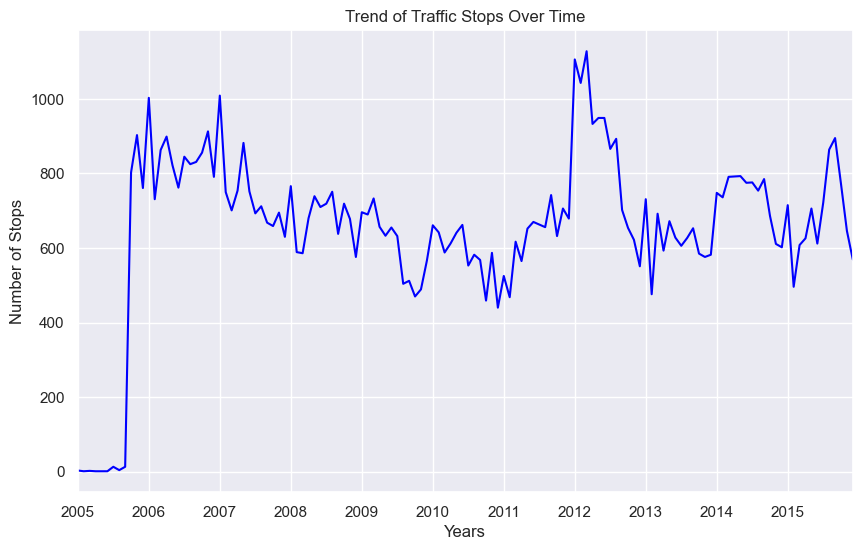

In [141]:
df['year_month'] = df['stop_date'].dt.to_period('M')
monthly_violations = df.groupby('year_month').size()

plt.figure(figsize=(10,6))
monthly_violations.plot(kind='line', color='blue')
plt.title('Trend of Traffic Stops Over Time')
plt.xlabel('Years')
plt.ylabel('Number of Stops')
plt.show()


### gender or ethnicity distribution analysis

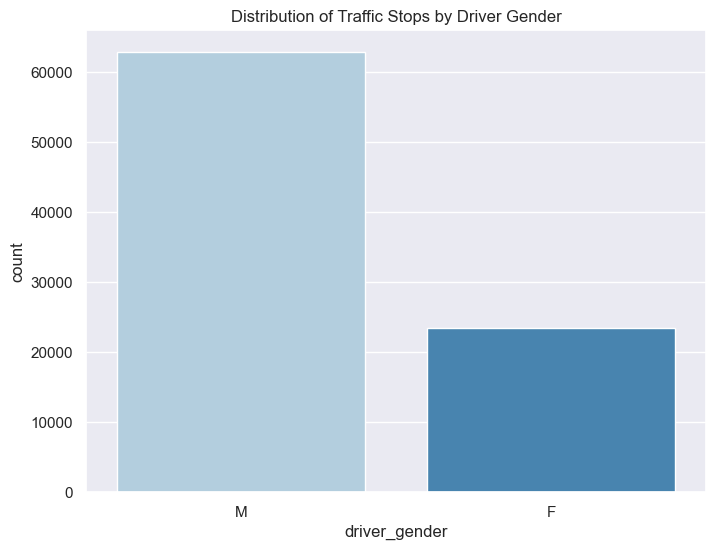

In [142]:
plt.figure(figsize=(8,6))
sns.countplot(x='driver_gender', data=df, palette='Blues')
plt.title('Distribution of Traffic Stops by Driver Gender')
plt.show()


### Percentage of types of violations

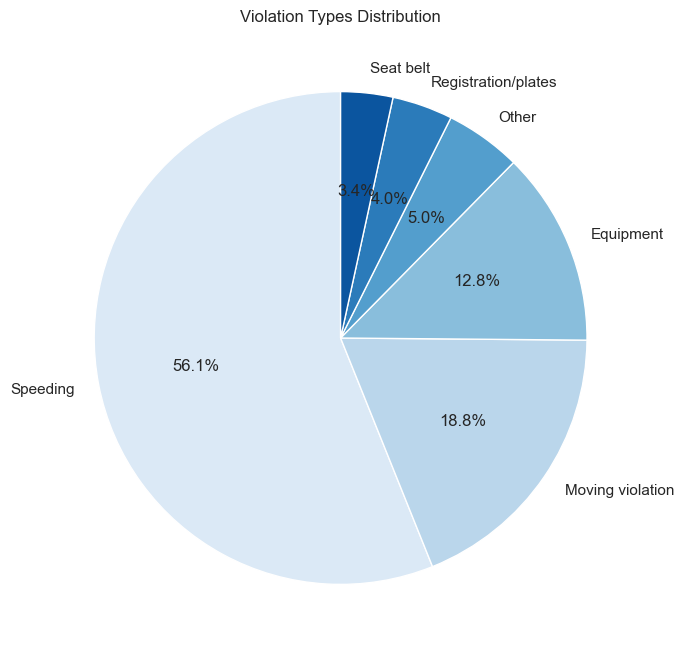

In [143]:
violation_counts = df['violation'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(violation_counts, labels=violation_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues', len(violation_counts)))
plt.title('Violation Types Distribution')
plt.show()


### Age distribution analysis

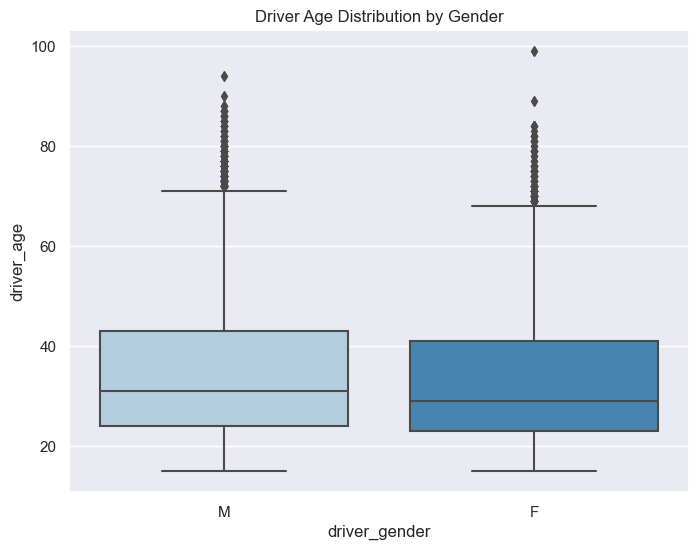

In [144]:
plt.figure(figsize=(8,6))
sns.boxplot(x='driver_gender', y='driver_age', data=df, palette='Blues')
plt.title('Driver Age Distribution by Gender')
plt.show()


### Analysis of the relationship between inspection type and stop results

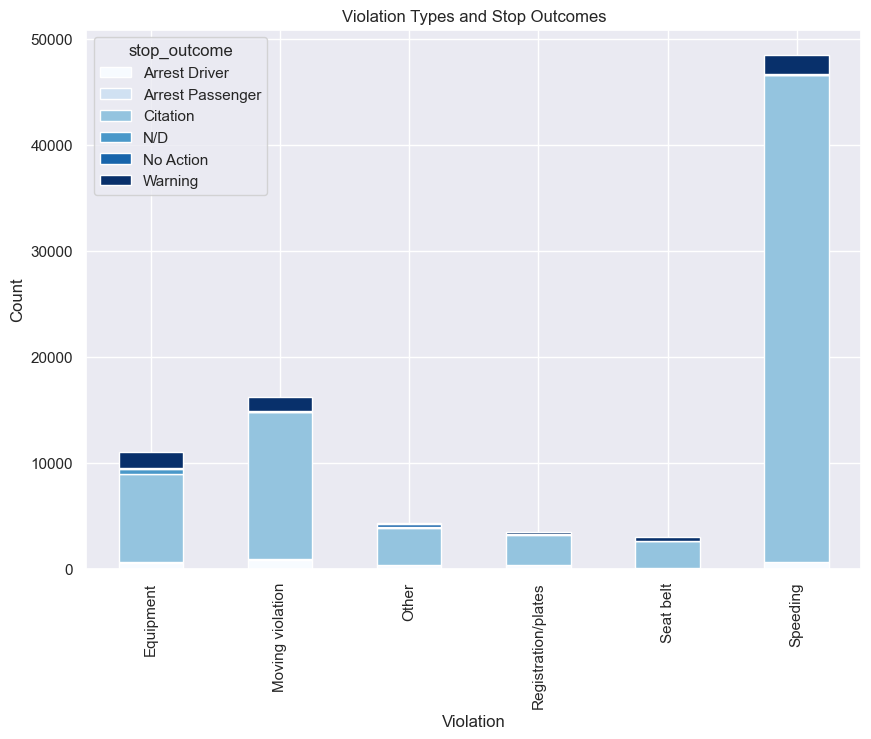

In [145]:
violation_outcome = pd.crosstab(df['violation'], df['stop_outcome'])
violation_outcome.plot(kind='bar', stacked=True, figsize=(10,7), colormap='Blues')
plt.title('Violation Types and Stop Outcomes')
plt.xlabel('Violation')
plt.ylabel('Count')
plt.show()


### Drug related stop analysis

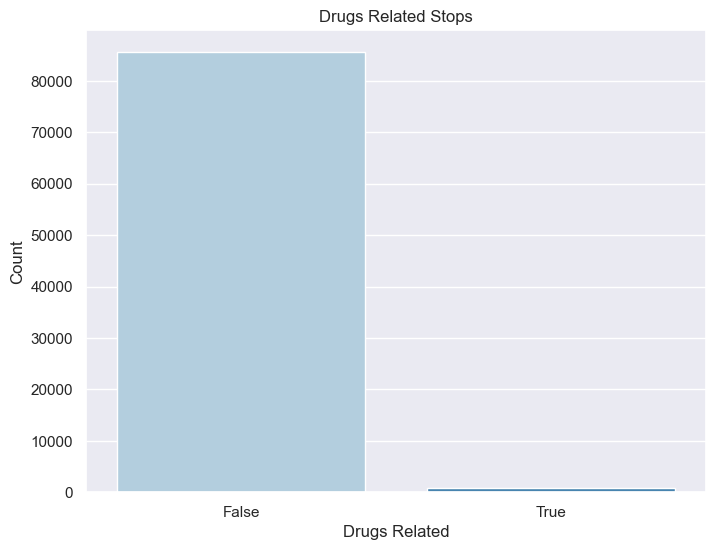

In [146]:
drug_related = df['drugs_related_stop'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=drug_related.index, y=drug_related.values, palette='Blues')
plt.title('Drugs Related Stops')
plt.xlabel('Drugs Related')
plt.ylabel('Count')
plt.show()


### Analysis of drug-related stops by race

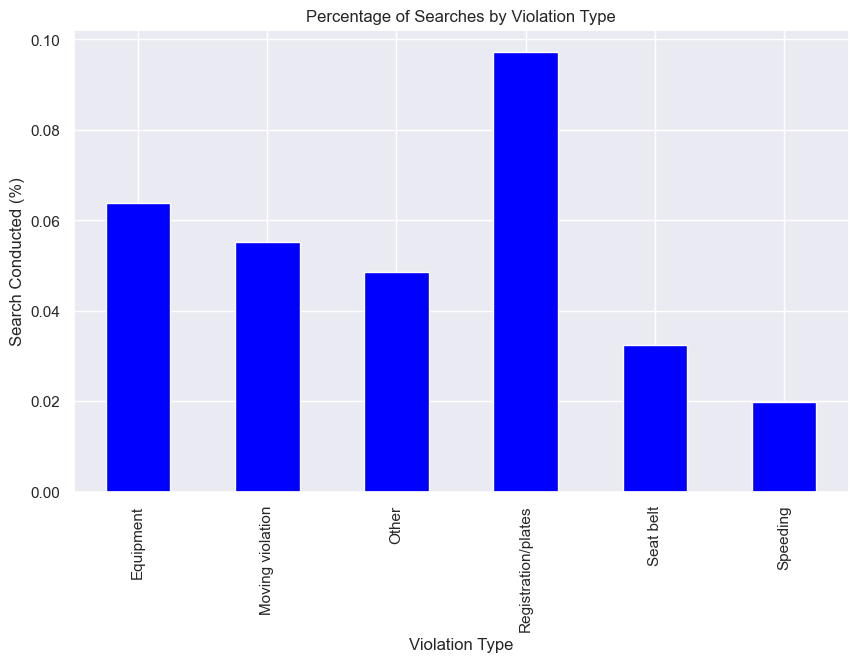

In [147]:
search_violation = df.groupby('violation')['search_conducted'].mean()
plt.figure(figsize=(10,6))
search_violation.plot(kind='bar', color='blue')
plt.title('Percentage of Searches by Violation Type')
plt.ylabel('Search Conducted (%)')
plt.xlabel('Violation Type')
plt.show()


### Arrest rate by race.

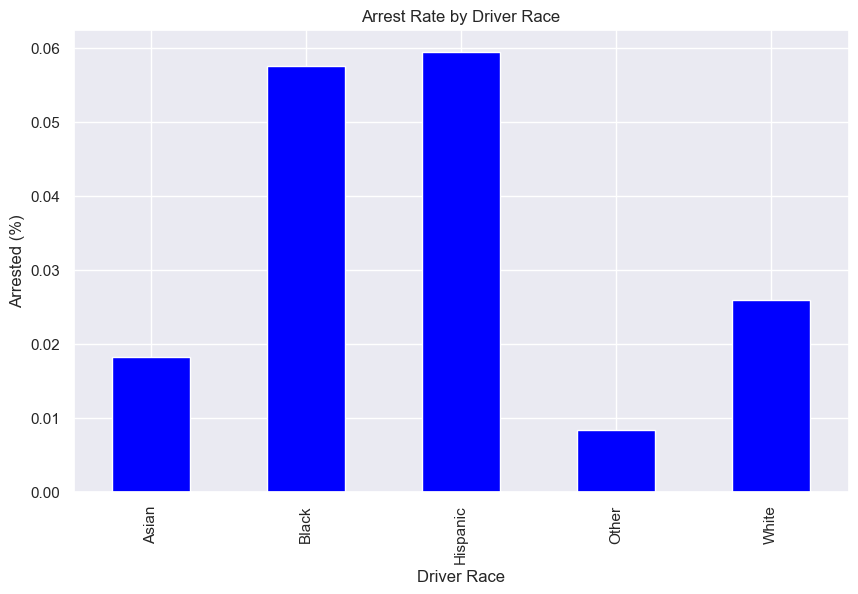

In [148]:
arrest_race = df.groupby('driver_race')['is_arrested'].mean()
plt.figure(figsize=(10,6))
arrest_race.plot(kind='bar', color='blue')
plt.title('Arrest Rate by Driver Race')
plt.ylabel('Arrested (%)')
plt.xlabel('Driver Race')
plt.show()


### Analysis of the number of stops by day of the week

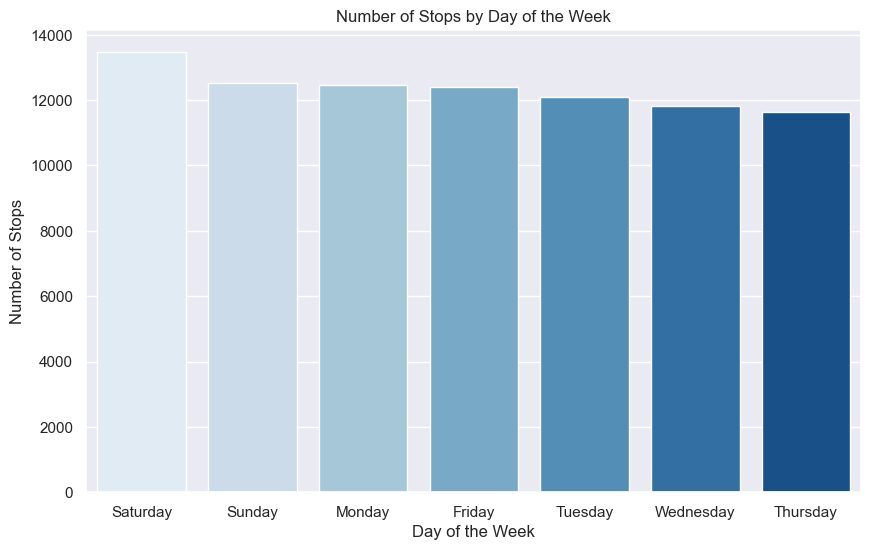

In [149]:
df['stop_date'] = pd.to_datetime(df['stop_date'])
df['day_of_week'] = df['stop_date'].dt.day_name()

stops_per_day = df['day_of_week'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=stops_per_day.index, y=stops_per_day.values, palette='Blues')
plt.title('Number of Stops by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Stops')
plt.show()


## ============================================================

# From the charts we can conclude some insights :
- Frequent Violations: Speeding is occurring more frequently
indicating that this problem may be more common or require more attention.
- Inspection effectiveness: Since citation is the most common type of inspection, there may be a heavy focus on speeding violations
indicating that this type of inspection is being used extensively to combat speeding.
- Having a high percentage of Black and Hispanic people in the data does not necessarily mean there is racism. There can be many factors that influence these percentages
such as:
- Population distribution: These groups may be larger in the areas where the data is collected.
Socioeconomic status: May have an impact on crime rates.
Resource distribution: May affect how laws are enforced and inspected in areas
- “registration/plates” is the highest type of violation in an inspection


## ============================================================

- Need for new policies: It may be useful to evaluate the effectiveness of current measures against speeding
such as checking whether policy changes or new strategies are needed to reduce this offence.
- Focus on education and awareness: Based on the data
it may be beneficial to implement awareness campaigns to reduce speeding and improve road safety.
- If “registration/plates” is the highest type of violation in an inspection, this could indicate a few potential issues:
    - Importance of proper registration: There could be a strong focus on ensuring that vehicle registrations and plate numbers are correct to ensure drivers are complying with the laws.

    - Strict enforcement of laws: There could be a strict policy or intensive inspection focused on vehicle registrations and plate numbers as a means of reducing violations and effectively enforcing the laws.

    - Impact of legal action: There could be a direct impact of this type of inspection on driver compliance with the laws
        as violations related to registration can have severe legal consequences.

    - Reforms and improvements: It could indicate that there are recurring issues related to registration and permits
        which necessitates a focus on this type of violation to ensure that everyone is complying with the laws.

    - Efficiency in monitoring: The systems or technology used to monitor and record these violations may be very effective
        increasing the number of violations recorded in this area. law enforcement strategies.

- Analysis of changes in the percentage of traffic stops from 2005 to 2012 may indicate several points:

    - Policy or strategy changes: There may have been changes in the policies or strategies used to enforce traffic laws
       which led to a significant increase in late 2005.

    - Increased enforcement: The large increase in traffic stops in early 2012 may have been the result of increased enforcement or more stringent road inspection measures.

    - Economic or social changes: There may have been economic or social influences that affected driving behavior or law enforcement, contributing to the discrepancy between increases and decreases.

    - Improvements in technology: There may have been improvements in technology or the use of more effective tools to monitor and record violations, which affected the number of traffic stops.

    - Effects of major events: Certain events such as changes in leadership or social issues may lead to sudden changes in law enforcement.

    - Focus on specific times: The discrepancy in the data may reflect a discrepancy in the focus on road inspections based on times of the year or specific events.

    - Reviewing policies, examining economic and social factors
       and analyzing the technology used can help understand the reasons for this disparity and plan for future adjustments in law enforcement strategies.

## ============================================================